# Task 1: Calculating the Mean First Passage Matrix for a Regular Markov Chain

**Task description**. The task is to check if a Markov chain is regular, calculate its steady state vector and the mean first passage matrix based on the probability transition matrix.

**Steps for Performing the Task:**

1. Prove that the Markov chain is regular (for this, enough to verify that ${p^k}$ has only non-zero (positive) entries for some integer $k$);

2. Calculate (approximately) the steady state vector $\alpha$ of the chain by calculation of $P^k$ for enough large $t$;

3. Calculate the mean first passage matrix $E$ .

**Student name:** Yan Jingyu

## Solution

I will use Python's Jupyter notebook to complete this task, in which I will use dependency libraries such as numpy and pandas.

### 0. Prepare Data

Prepare my personal Markov chain probability transition matrix, Import the required libraries and read the transition matrix P.

In [1]:
import pandas as pd
import numpy as np

np.set_printoptions(linewidth=200, threshold=1000, suppress=True, formatter={'float': '{:0.5f}'.format})

def get_my_transition_matrix(xlsx_file, my_name, num_rows=11, use_cols='C:M', ) -> np.ndarray:
    """
    Read my personal transition matrix from an Excel (xlsx) file.
    """
    df = pd.read_excel(xlsx_file)
    row_index = df[df[df.columns[0]] == my_name].index
    if row_index.empty:
        raise FileNotFoundError(
            "transition matrix does not exist, please check the name is correct.")

    region = pd.read_excel(xlsx_file, usecols=use_cols, skiprows=row_index[0] + 1, nrows=num_rows)

    return region.to_numpy()

xlsx_filename = "TaskWorksheets1.xlsx"
my_name = "Yan Jingyu"
P = get_my_transition_matrix(xlsx_filename, my_name)
print(f'My transition matrix P = \n{P}')

My transition matrix P = 
[[0.00000 0.00000 0.00000 0.21064 0.00000 0.18934 0.00000 0.00000 0.27476 0.32526 0.00000]
 [0.00000 0.23340 0.44311 0.00000 0.00000 0.00000 0.00000 0.00000 0.32348 0.00000 0.00000]
 [0.50398 0.00000 0.00000 0.00000 0.00000 0.43275 0.00000 0.00000 0.00000 0.00000 0.06327]
 [0.00000 0.00000 0.49275 0.00000 0.50725 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.30974 0.00000 0.00000 0.00000 0.00000 0.69026 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.02998 0.00000 0.00000 0.00000 0.00000 0.39229 0.00000 0.57774 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.43948 0.00000 0.00000 0.00000 0.00000 0.00000 0.56052]
 [0.47684 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.52316 0.00000 0.00000]
 [0.48492 0.00000 0.00000 0.00000 0.29683 0.00000 0.00000 0.00000 0.00000 0.21825 0.00000]
 [0.00000 0.08205 0.36807 0.00000 0.34591 0.00000 0.00000 0.00000 0.00000 0.00000 0.20397]
 [0.00000 0.00000 0.12319 0.36212 0.12949 0.00000 0.38520 0.0000

![](fig1.png)

## 1.  Prove that the Markov chain is regular

Prove that the Markov chain is regular (for this, enough to verify that ${p^k}$ has only non-zero (positive) entries for some integer $k$);

In [2]:
# Use numpy's matrix_power function.
matrix_power = np.linalg.matrix_power

def check_transition_matrix_is_regular(P: np.ndarray, k = 10):
    """
    Check whether the k-powers of the p-matrix are all positive.
    """
    # Remark the last power matrix
    P_k = matrix_power(P, k)
    
    return (P_k > 0).all(), P_k

k = 5
ret, P_k = check_transition_matrix_is_regular(P, k)
assert ret
print(f"P_k Matrix is regular: {ret}\n")
print(f'P_{k} Matrix = \n{P_k}')

P_k Matrix is regular: True

P_5 Matrix = 
[[0.20637 0.01028 0.07725 0.03308 0.10660 0.19397 0.01009 0.13224 0.14158 0.05772 0.03082]
 [0.22075 0.00919 0.05300 0.04798 0.07790 0.24392 0.01465 0.10564 0.12779 0.07423 0.02496]
 [0.13866 0.00916 0.06864 0.05973 0.11437 0.20185 0.00573 0.14851 0.10774 0.11441 0.03121]
 [0.26026 0.00497 0.02169 0.05889 0.06842 0.22417 0.01305 0.07190 0.15432 0.11017 0.01217]
 [0.15700 0.01121 0.07777 0.05873 0.12763 0.18605 0.00368 0.11105 0.11364 0.12214 0.03110]
 [0.18608 0.01370 0.08514 0.04938 0.11358 0.23814 0.01283 0.09638 0.08838 0.08401 0.03237]
 [0.16447 0.00329 0.04372 0.05193 0.09626 0.21108 0.00592 0.16211 0.12959 0.09559 0.03604]
 [0.16419 0.00763 0.05123 0.05289 0.07343 0.25040 0.01235 0.16584 0.11608 0.07811 0.02785]
 [0.17783 0.00628 0.04738 0.05524 0.08889 0.20965 0.01131 0.15598 0.12775 0.09790 0.02179]
 [0.21696 0.00544 0.03747 0.05441 0.08256 0.22218 0.01103 0.11010 0.13796 0.09841 0.02348]
 [0.23071 0.00657 0.05797 0.03904 0.08751 0.209

It is obvious that all entries of $p^{5}$ are positive. So, the chain is regular.

## 2.  Calculate the  steady state vector  $\alpha$ 

Calculate (approximately) the steady state vector $\alpha$ of the chain by calculation of $P^k$ for enough large $t$.

In [3]:
# Calculate the t-th power of the P matrix and analyze its results.
t = 50
P_50 = matrix_power(P, t)
print(f'P_50 Matrix = \n{P_50}')

P_50 Matrix = 
[[0.18793 0.00935 0.06424 0.04970 0.09950 0.21732 0.01075 0.12555 0.12035 0.08739 0.02792]
 [0.18793 0.00935 0.06424 0.04970 0.09950 0.21732 0.01075 0.12555 0.12035 0.08739 0.02792]
 [0.18793 0.00935 0.06424 0.04970 0.09950 0.21732 0.01075 0.12555 0.12035 0.08739 0.02792]
 [0.18793 0.00935 0.06424 0.04970 0.09950 0.21732 0.01075 0.12555 0.12035 0.08739 0.02792]
 [0.18793 0.00935 0.06424 0.04970 0.09950 0.21732 0.01075 0.12555 0.12035 0.08739 0.02792]
 [0.18793 0.00935 0.06424 0.04970 0.09950 0.21732 0.01075 0.12555 0.12035 0.08739 0.02792]
 [0.18793 0.00935 0.06424 0.04970 0.09950 0.21732 0.01075 0.12555 0.12035 0.08739 0.02792]
 [0.18793 0.00935 0.06424 0.04970 0.09950 0.21732 0.01075 0.12555 0.12035 0.08739 0.02792]
 [0.18793 0.00935 0.06424 0.04970 0.09950 0.21732 0.01075 0.12555 0.12035 0.08739 0.02792]
 [0.18793 0.00935 0.06424 0.04970 0.09950 0.21732 0.01075 0.12555 0.12035 0.08739 0.02792]
 [0.18793 0.00935 0.06424 0.04970 0.09950 0.21732 0.01075 0.12555 0.12035 0

Define some methods to check $\alpha$.

In [4]:
# Detect whether the probability vector distribution of each row of alpha is consistent.
def check_each_row_same_probability(alpha: np.ndarray):
    epsilon = 1e-3
    return (np.sum(alpha, 1) - 1.0 < epsilon).all()

assert check_each_row_same_probability(P_50)

# Check alpha are positive
assert (P_50 >= 0).all()
print("alpha is positive")

alpha is positive


Check if alpha contains a stable vector.

In [5]:
def check_significance_digits_mae(matrix):
    # Initialize an empty array to store the MAE of each row compared with other rows
    row_maes = np.zeros((len(matrix), len(matrix)))

    # Calculate MAE for each row compared with every other row
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if i != j:
                row_maes[i, j] = np.mean(np.abs(matrix[i] - matrix[j]))

    # Calculate the average MAE, ignoring the diagonal (comparison of the row with itself)
    np.fill_diagonal(row_maes, np.nan)
    average_mae = np.nanmean(row_maes)

    # Determine if the average MAE is within the desired precision
    accuracy_3_digits = average_mae < 0.001
    accuracy_4_digits = average_mae < 0.0001

    return accuracy_3_digits and accuracy_4_digits

assert check_significance_digits_mae(P_50)
print(f"Rows of Pt for t={t} are equal to an accuracy of 3-4 significance digits")

Rows of Pt for t=50 are equal to an accuracy of 3-4 significance digits


## 2.  Calculate the mean first passage matrix  $𝐸$

We calculate the mean first passage matrix $𝐸$ in several steps.

In [6]:
print(f'P=\n{P}')

P=
[[0.00000 0.00000 0.00000 0.21064 0.00000 0.18934 0.00000 0.00000 0.27476 0.32526 0.00000]
 [0.00000 0.23340 0.44311 0.00000 0.00000 0.00000 0.00000 0.00000 0.32348 0.00000 0.00000]
 [0.50398 0.00000 0.00000 0.00000 0.00000 0.43275 0.00000 0.00000 0.00000 0.00000 0.06327]
 [0.00000 0.00000 0.49275 0.00000 0.50725 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.30974 0.00000 0.00000 0.00000 0.00000 0.69026 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.02998 0.00000 0.00000 0.00000 0.00000 0.39229 0.00000 0.57774 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.43948 0.00000 0.00000 0.00000 0.00000 0.00000 0.56052]
 [0.47684 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.52316 0.00000 0.00000]
 [0.48492 0.00000 0.00000 0.00000 0.29683 0.00000 0.00000 0.00000 0.00000 0.21825 0.00000]
 [0.00000 0.08205 0.36807 0.00000 0.34591 0.00000 0.00000 0.00000 0.00000 0.00000 0.20397]
 [0.00000 0.00000 0.12319 0.36212 0.12949 0.00000 0.38520 0.00000 0.00000 0.00000 0.000

In [7]:
class CalculateMeanFirstPassageMatrix(object):
    
    def __init__(self, P: np.ndarray, t: int):
        P_k = matrix_power(P, k)
        assert (P_k > 0).all(), "The chain is not regular."
        assert check_each_row_same_probability(P_k)
        assert (P_k >= 0).all()
        assert check_significance_digits_mae(P_k)
        # Choose the first row vector as w
        self.w = P_k[0]
        
        # Identity matrix I
        self.I = np.eye(self.w.shape[0])
        
        # W matrix
        self.W = np.tile(self.w, (self.w.shape[0], 1))
        
        # Diagonal matrix D
        self.D = np.diag(1 / self.w)
        
        # Fundamental matrix
        self.Z = np.linalg.inv(self.I - (P - self.W))
        
        # Z_dg matrix
        self.Z_dg = np.zeros_like(self.Z)
        np.fill_diagonal(self.Z_dg, np.diag(self.Z))
        
        # J matrix
        self.J = np.ones_like(self.Z)
        
        # Mean first passage matrix Z
        self.E = (self.I - self.Z + self.J @ self.Z_dg) @ self.D

k = 50
obj = CalculateMeanFirstPassageMatrix(P, 50)

#### Vector $w$:

In [8]:
# w can be taken as approximation of the limiting vector alpha
print(f'w = {obj.w}')

w = [0.18793 0.00935 0.06424 0.04970 0.09950 0.21732 0.01075 0.12555 0.12035 0.08739 0.02792]


In [9]:
# Check w = w * P
epsilon = 1e-4
assert (np.dot(obj.w, P) - obj.w < epsilon).all()

So, vector $w$ can be taken as an approximation of the limiting vector $\alpha$.The mean first passage matrix is calculated using the following formula.

#### Identity matrix $I$:

In [10]:
# Identity matrix I
print(f"Identity matrix I = \n{obj.I}")

Identity matrix I = 
[[1.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.00000 1.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.00000 0.00000 1.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 1.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 1.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.00000 1.00000 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 1.00000 0.00000 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 1.00000 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 1.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 1.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.0

#### Matrix $W$:

In [11]:
# W matrix
print(f"W = \n{obj.W}")

W = 
[[0.18793 0.00935 0.06424 0.04970 0.09950 0.21732 0.01075 0.12555 0.12035 0.08739 0.02792]
 [0.18793 0.00935 0.06424 0.04970 0.09950 0.21732 0.01075 0.12555 0.12035 0.08739 0.02792]
 [0.18793 0.00935 0.06424 0.04970 0.09950 0.21732 0.01075 0.12555 0.12035 0.08739 0.02792]
 [0.18793 0.00935 0.06424 0.04970 0.09950 0.21732 0.01075 0.12555 0.12035 0.08739 0.02792]
 [0.18793 0.00935 0.06424 0.04970 0.09950 0.21732 0.01075 0.12555 0.12035 0.08739 0.02792]
 [0.18793 0.00935 0.06424 0.04970 0.09950 0.21732 0.01075 0.12555 0.12035 0.08739 0.02792]
 [0.18793 0.00935 0.06424 0.04970 0.09950 0.21732 0.01075 0.12555 0.12035 0.08739 0.02792]
 [0.18793 0.00935 0.06424 0.04970 0.09950 0.21732 0.01075 0.12555 0.12035 0.08739 0.02792]
 [0.18793 0.00935 0.06424 0.04970 0.09950 0.21732 0.01075 0.12555 0.12035 0.08739 0.02792]
 [0.18793 0.00935 0.06424 0.04970 0.09950 0.21732 0.01075 0.12555 0.12035 0.08739 0.02792]
 [0.18793 0.00935 0.06424 0.04970 0.09950 0.21732 0.01075 0.12555 0.12035 0.08739 0.0

#### Diagonal matrix $D$: 

In [12]:
# Diagonal matrix D
print(f"Diagonal matrix D = \n{obj.D}")

Diagonal matrix D = 
[[5.32100 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.00000 106.91190 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.00000 0.00000 15.56705 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 20.12221 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 10.05008 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.00000 4.60159 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 92.99139 0.00000 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 7.96487 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 8.30939 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 11.44273 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00

#### Fundamental matrix $Z$:

In [13]:
# Fundamental matrix Z
print(f"Fundamental matrix Z = \n{obj.Z}")

Fundamental matrix Z = 
[[0.78786 0.00634 0.06166 0.11870 0.02389 -0.04108 -0.00815 -0.14929 0.02007 0.17324 0.00675]
 [-0.06473 1.28406 0.43689 -0.07346 -0.13310 -0.21784 -0.02153 -0.25140 0.14572 -0.07664 -0.02797]
 [0.18647 -0.01700 0.91224 -0.00366 -0.14056 0.19045 -0.00356 -0.01552 -0.08273 -0.04480 0.01867]
 [-0.06980 -0.02819 0.31210 0.91497 0.23769 0.11288 -0.03270 -0.06034 -0.18021 -0.14942 -0.05698]
 [0.05176 -0.02063 -0.14424 -0.06611 0.80128 0.46594 -0.03981 0.14364 -0.03765 -0.07877 -0.07542]
 [-0.00628 -0.01919 -0.14357 -0.07704 -0.15446 1.00829 -0.03843 0.45697 0.11079 -0.06525 -0.07185]
 [-0.34188 -0.04089 -0.06092 0.09446 0.37441 -0.08223 1.21919 -0.17306 -0.31804 -0.26800 0.59694]
 [0.27781 -0.00432 -0.04303 -0.00117 0.00852 -0.29201 -0.02139 0.70575 0.32381 0.07364 -0.02761]
 [0.17216 0.00384 -0.01566 -0.01545 0.18470 -0.10532 -0.01290 -0.18640 0.83068 0.14990 -0.00556]
 [-0.17100 0.07443 0.28176 -0.01691 0.15932 -0.02927 0.06244 -0.14246 -0.21778 0.80946 0.19001]
 [

#### Matrix $Z_{dg}$:

In [14]:
# Z_dg matrix
print(f"Z_dg = \n{obj.Z_dg}")

Z_dg = 
[[0.78786 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.00000 1.28406 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.91224 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.91497 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.80128 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.00000 1.00829 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 1.21919 0.00000 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.70575 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.83068 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.80946 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 

#### $I − Z + JZ_{dg}$: 

In [15]:
# I − Z + JZdg
print(f"I − Z + JZdg = \n{obj.I - obj.Z + obj.J @ obj.Z_dg}")

I − Z + JZdg = 
[[1.00000 1.27772 0.85058 0.79627 0.77739 1.04937 1.22734 0.85503 0.81061 0.63621 1.16718]
 [0.85258 1.00000 0.47535 0.98843 0.93439 1.22613 1.24072 0.95715 0.68496 0.88610 1.20190]
 [0.60139 1.30106 1.00000 0.91863 0.94184 0.81784 1.22275 0.72127 0.91341 0.85426 1.15526]
 [0.85765 1.31226 0.60014 1.00000 0.56359 0.89541 1.25189 0.76608 1.01089 0.95888 1.23090]
 [0.73610 1.30469 1.05648 0.98107 1.00000 0.54235 1.25900 0.56211 0.86833 0.88823 1.24935]
 [0.79413 1.30325 1.05581 0.99201 0.95574 1.00000 1.25762 0.24877 0.71989 0.87471 1.24578]
 [1.12973 1.32495 0.97316 0.82051 0.42687 1.09052 1.00000 0.87880 1.14872 1.07746 0.57698]
 [0.51004 1.28838 0.95527 0.91614 0.79277 1.30030 1.24058 1.00000 0.50688 0.73582 1.20154]
 [0.61570 1.28022 0.92790 0.93042 0.61658 1.11361 1.23209 0.89215 1.00000 0.65956 1.17949]
 [0.95886 1.20963 0.63048 0.93188 0.64196 1.03756 1.15675 0.84821 1.04847 1.00000 0.98392]
 [1.10308 1.32414 0.79322 0.60596 0.58405 1.13261 0.77775 0.90312 1.15386 

#### Mean first passage matrix $E$:

In [16]:
# Mean first passage matrix E
print(f"Mean first passage matrix E = \n{obj.E}")

Mean first passage matrix E = 
[[5.32100 136.60355 13.24099 16.02262 7.81287 4.82879 114.13236 6.81023 6.73567 7.28003 41.80868]
 [4.53659 106.91190 7.39974 19.88938 9.39066 5.64214 115.37614 7.62358 5.69163 10.13941 43.05246]
 [3.20001 139.09856 15.56705 18.48482 9.46557 3.76336 113.70539 5.74480 7.58992 9.77504 41.38171]
 [4.56358 140.29576 9.34235 20.12221 5.66417 4.12032 116.41504 6.10176 8.39991 10.97224 44.09136]
 [3.91676 139.48732 16.44626 19.74139 10.05008 2.49566 117.07583 4.47710 7.21533 10.16380 44.75215]
 [4.22559 139.33261 16.43582 19.96137 9.60525 4.60159 116.94791 1.98144 5.98184 10.00909 44.62423]
 [6.01132 141.65260 15.14917 16.51055 4.29010 5.01811 92.99139 6.99955 9.54520 12.32907 20.66771]
 [2.71394 137.74332 14.87069 18.43484 7.96736 5.98343 115.36310 7.96487 4.21183 8.41980 43.03942]
 [3.27612 136.87071 14.44464 18.72202 6.19671 5.12438 114.57342 7.10582 8.30939 7.54719 42.24973]
 [5.10209 129.32352 9.81470 18.75148 6.45173 4.77443 107.56793 6.75587 8.71211 11.44

## 3. Verify My Process

To verify that my steps are correct, I will use the 15x15 probability transition matrix provided in the teacher's example and follow the same steps as above to calculate the Mean First Passage Matrix E:

In [17]:
np.set_printoptions(linewidth=200, threshold=1000, suppress=True, formatter={'float': '{:0.3f}'.format})

def get_example_matrix_str(text: str) -> np.ndarray:
    """
    Text to matrix
    """
    data_list = [float(number) for number in text.split()]

    mat = np.array(data_list).reshape(15, 15)

    return mat

# The 15x15 matrix in the example is for verification purposes only
P = get_example_matrix_str("0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.6471 0.0000 0.3529 0.0000 0.0000 0.0000 0.3786 0.0000 0.0000 0.0000 0.0000 0.0000 0.1072 0.0000 0.0000 0.0000 0.0000 0.0000 0.5142 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0832 0.1882 0.5169 0.0000 0.0000 0.0000 0.0000 0.0000 0.2116 0.0000 0.3532 0.0000 0.0000 0.0000 0.0518 0.0000 0.0000 0.1502 0.0000 0.0000 0.3496 0.0000 0.0952 0.0000 0.3051 0.0000 0.0000 0.0000 0.0000 0.1197 0.0000 0.0000 0.0000 0.0000 0.0000 0.3114 0.0000 0.0000 0.2638 0.0000 0.0000 0.0000 0.0000 0.1352 0.0000 0.0000 0.0000 0.5226 0.0000 0.0000 0.0000 0.3422 0.0000 0.0000 0.0000 0.0091 0.6572 0.0000 0.3337 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.4596 0.0000 0.0000 0.0000 0.0000 0.1501 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.3903 0.0000 0.0000 0.0000 0.1317 0.0000 0.7591 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.1093 0.0000 0.0000 0.0000 0.0000 0.0000 0.2183 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.2366 0.0000 0.5452 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.6985 0.0000 0.0000 0.0000 0.3015 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.2327 0.0000 0.0000 0.2122 0.2804 0.0000 0.0000 0.0000 0.2747 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.3387 0.0000 0.0000 0.0000 0.0000 0.0000 0.0021 0.0000 0.0000 0.0000 0.3923 0.0000 0.2669 0.0000 0.5361 0.0000 0.0000 0.3795 0.0000 0.0000 0.0612 0.0000 0.0232 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.3084 0.0000 0.0000 0.0000 0.4457 0.0000 0.2145 0.0000 0.0000 0.0314")
t = 50
example = CalculateMeanFirstPassageMatrix(P, t)
predict_E = example.E
print(f'w = \n{example.w}')
print(f'E = \n{predict_E}')

w = 
[0.054 0.080 0.068 0.131 0.062 0.048 0.006 0.015 0.125 0.046 0.011 0.122 0.100 0.032 0.102]
E = 
[[18.488 9.971 16.715 8.172 14.005 21.399 187.200 69.307 8.398 23.106 92.281 4.589 19.077 18.950 10.294]
 [23.251 12.541 10.196 8.014 19.206 18.616 180.681 65.485 6.922 18.239 87.414 11.103 15.631 32.950 5.122]
 [21.846 11.064 14.743 6.705 18.962 20.060 170.485 56.449 4.890 21.344 90.519 10.738 15.990 31.582 8.299]
 [21.341 6.965 14.611 7.633 17.339 19.842 185.096 68.751 6.871 21.925 91.100 7.931 17.776 28.627 8.937]
 [14.628 11.934 16.839 8.322 16.096 18.050 187.324 70.586 8.328 21.373 90.547 6.281 17.567 27.856 8.388]
 [23.048 11.252 13.585 6.767 17.696 20.927 184.070 68.348 4.811 22.115 91.289 11.043 12.024 32.334 9.070]
 [20.449 12.253 6.712 8.256 13.636 20.376 177.196 62.248 7.055 22.325 91.500 10.253 17.513 31.351 9.300]
 [13.728 12.505 13.936 9.260 17.886 18.471 184.421 68.041 8.644 22.515 91.689 9.421 11.572 27.682 9.552]
 [22.855 7.751 14.332 3.031 18.872 20.650 184.817 68.787

Compare the expected E matrix with the E matrix I calculated to verify whether the results are consistent.

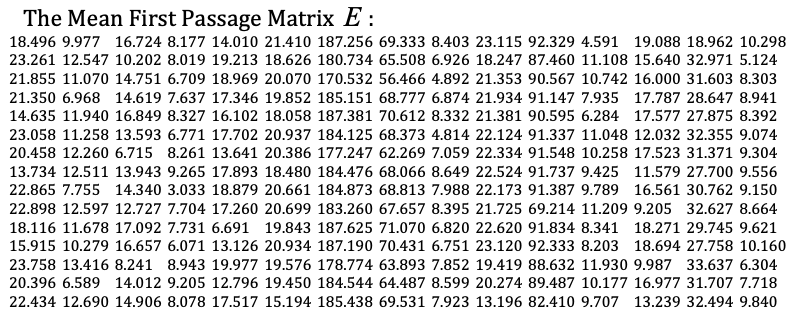

From the conclusion, there is an error of 2-3 decimal places.